<a href="https://colab.research.google.com/github/NarottamSharma/DeepLearning/blob/main/pothole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jan 27 06:16:40 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.4/112.6 GB disk)


In [ ]:
!pip install IPython

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fziquxCKwm0tLwXit4wQ")
project = rf.workspace("ai-training-session").project("kuwait-potholes")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/Kuwait-Potholes-1'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 164MB/s]
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Kuwait-Potholes-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

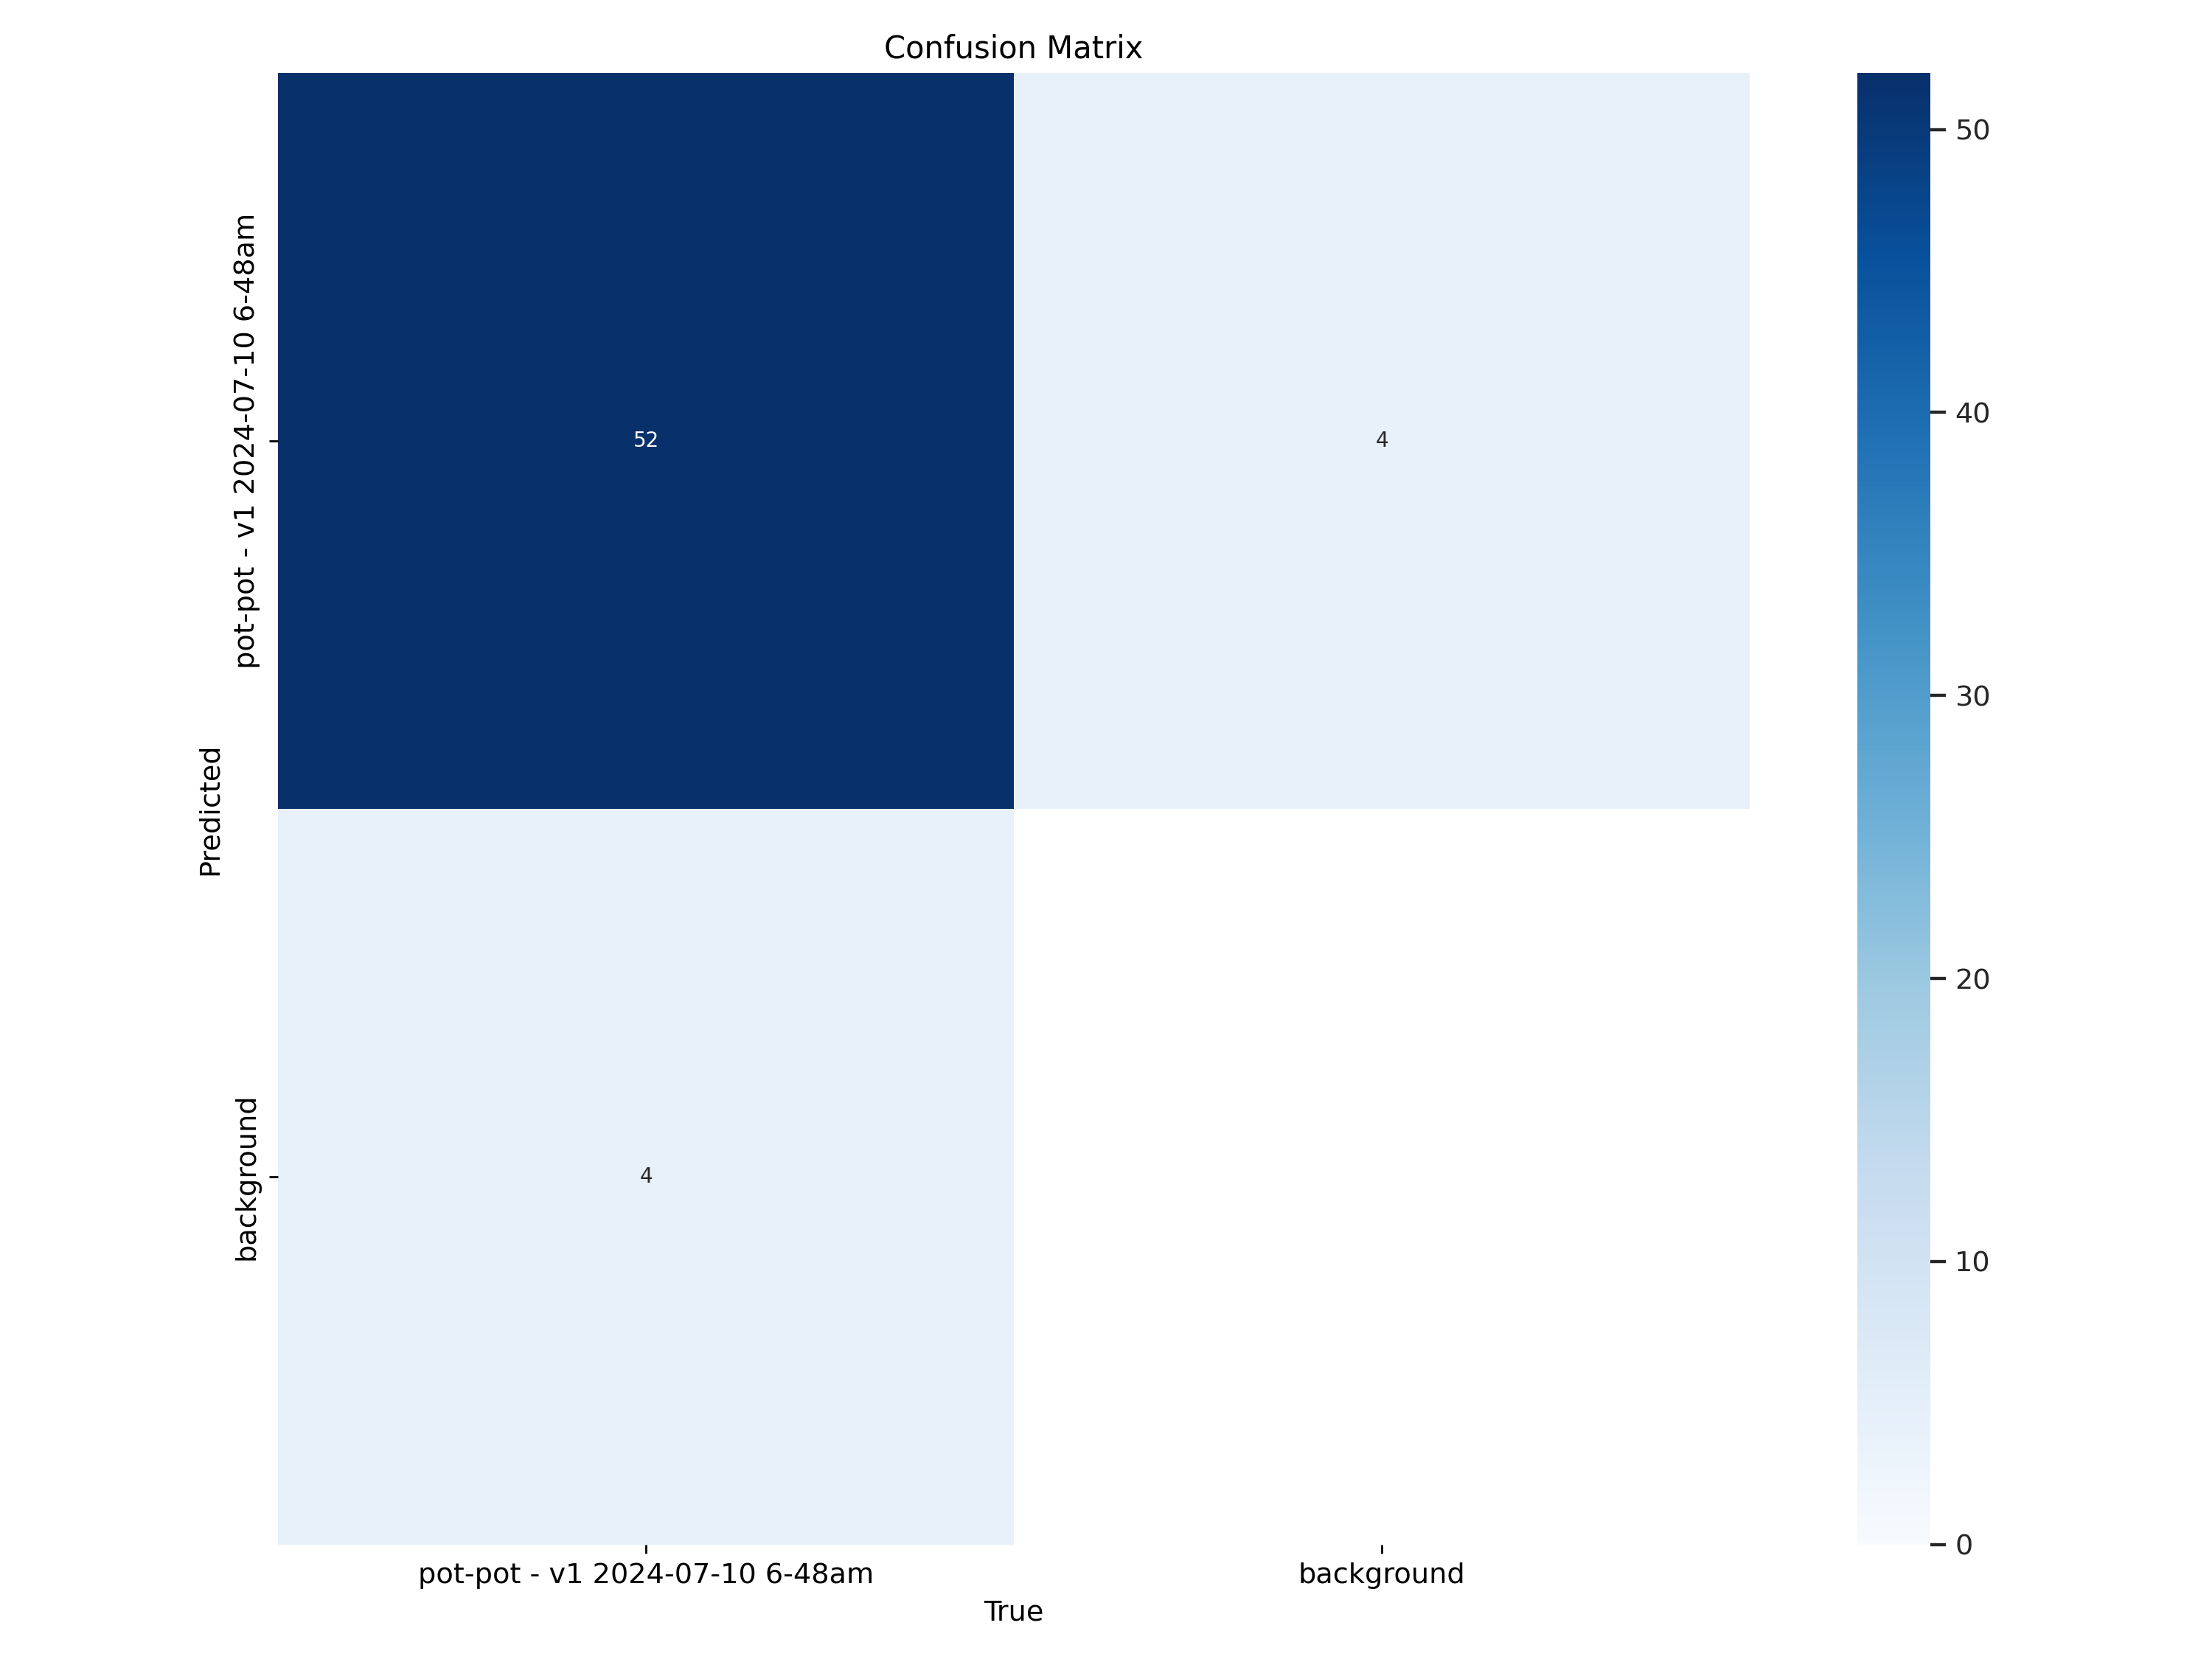

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png",width=600)

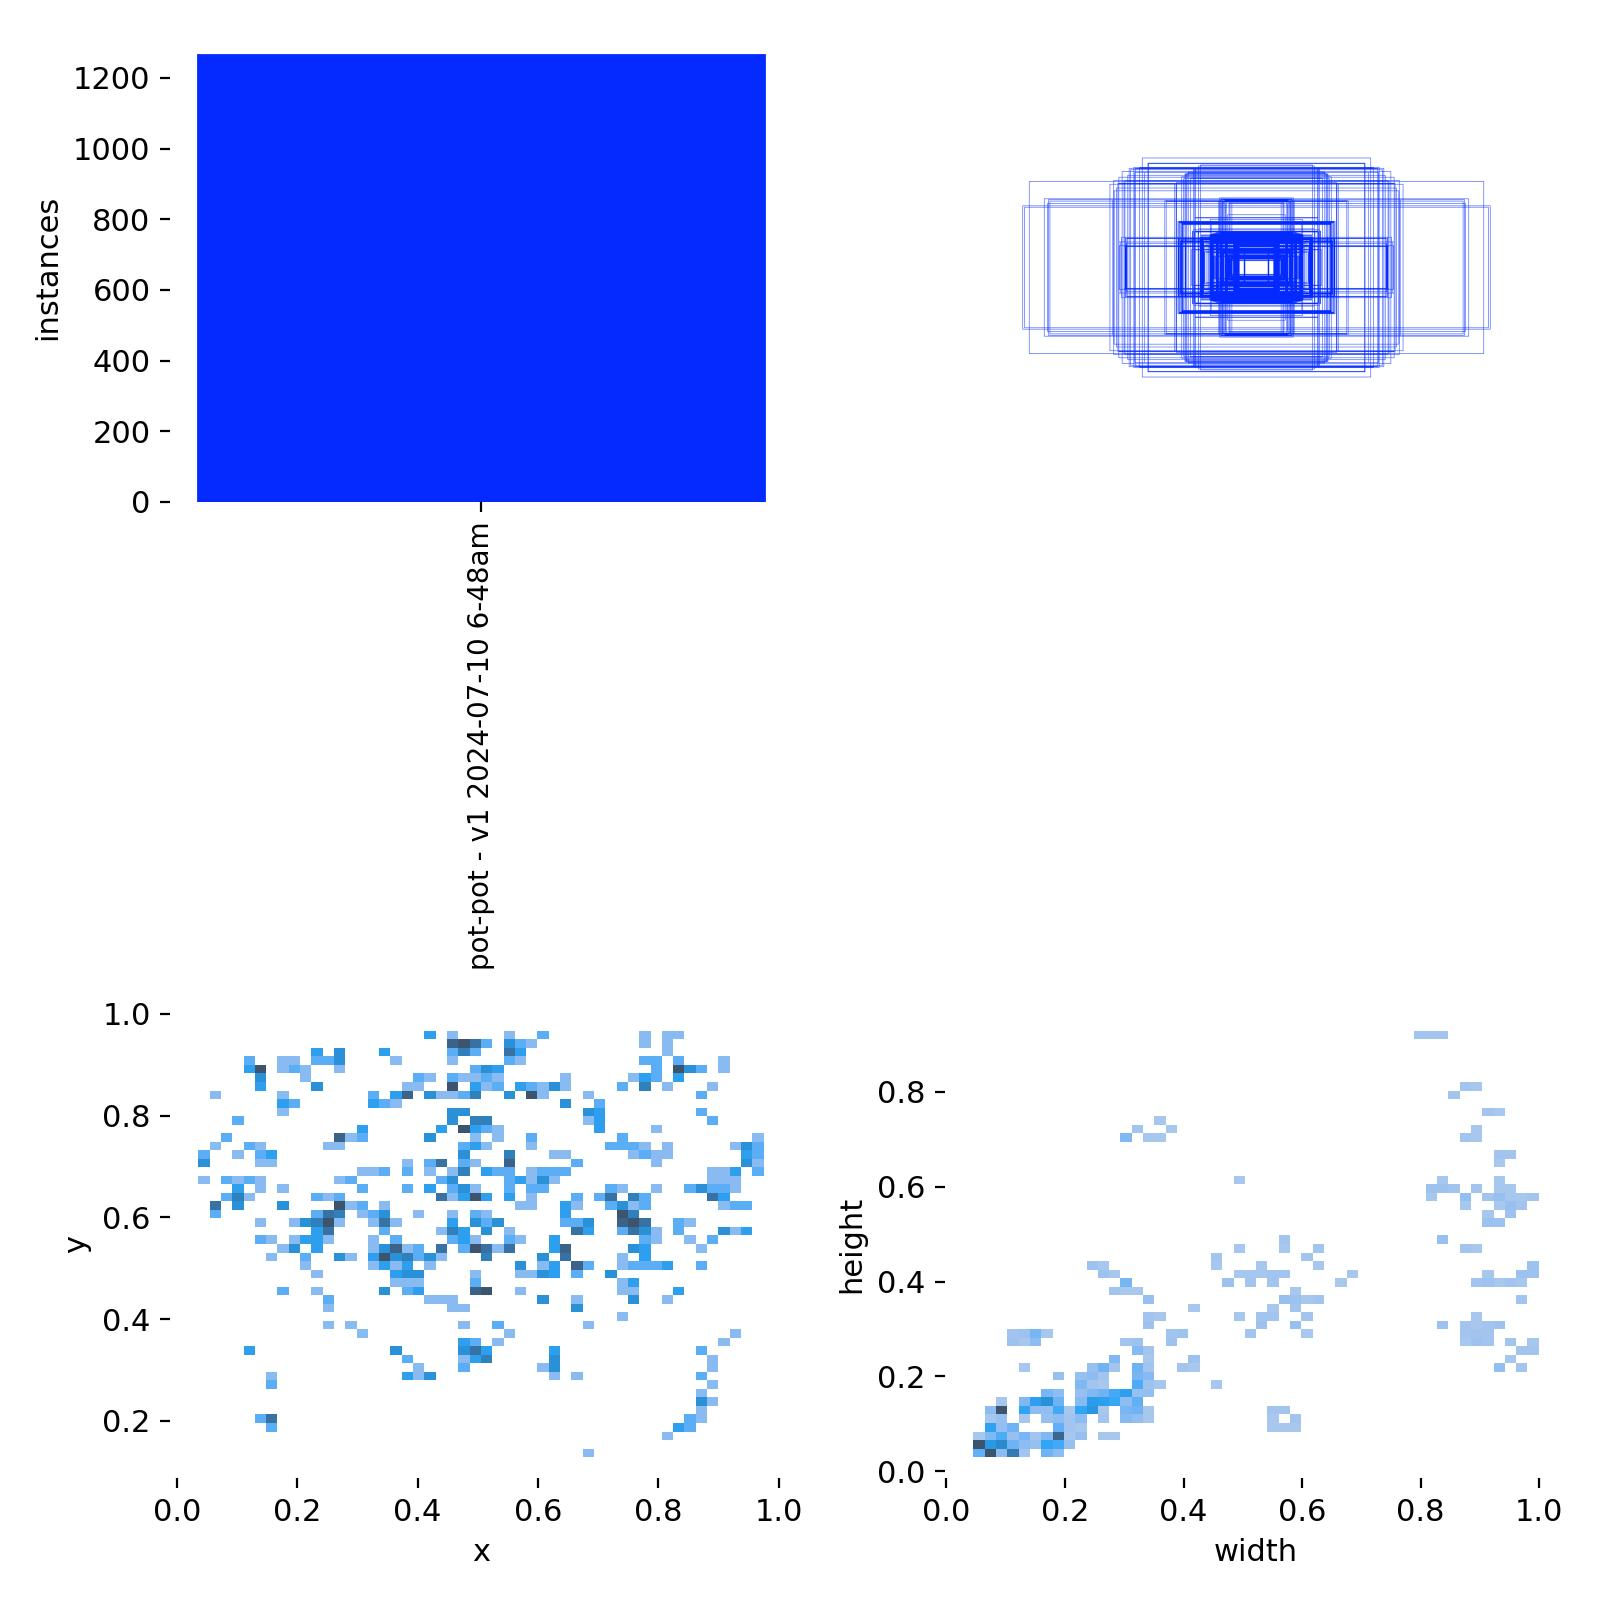

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

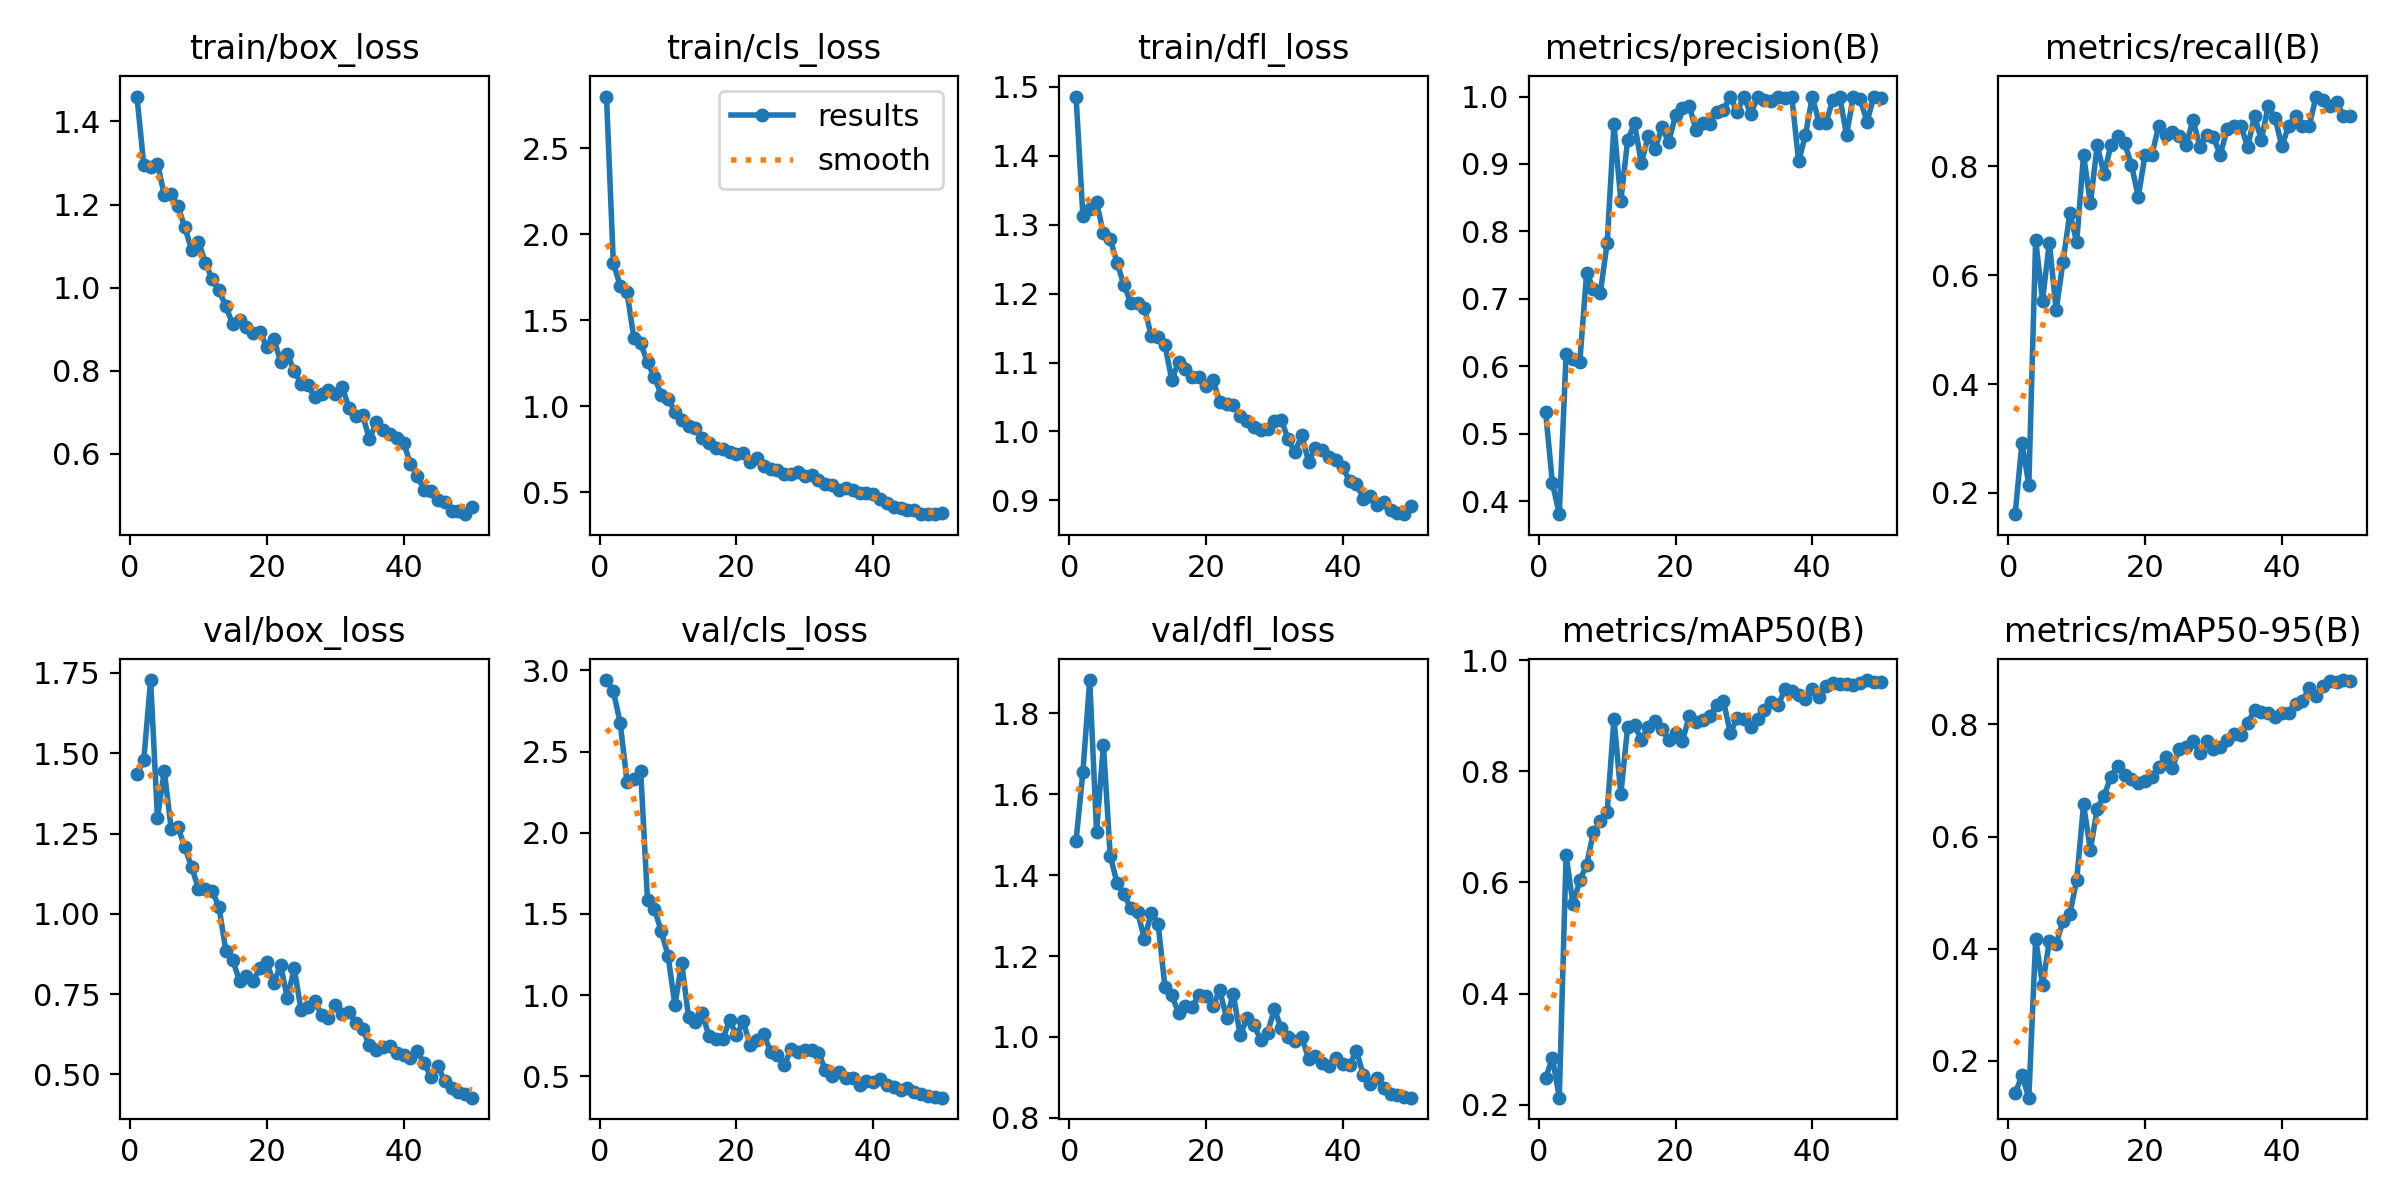

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

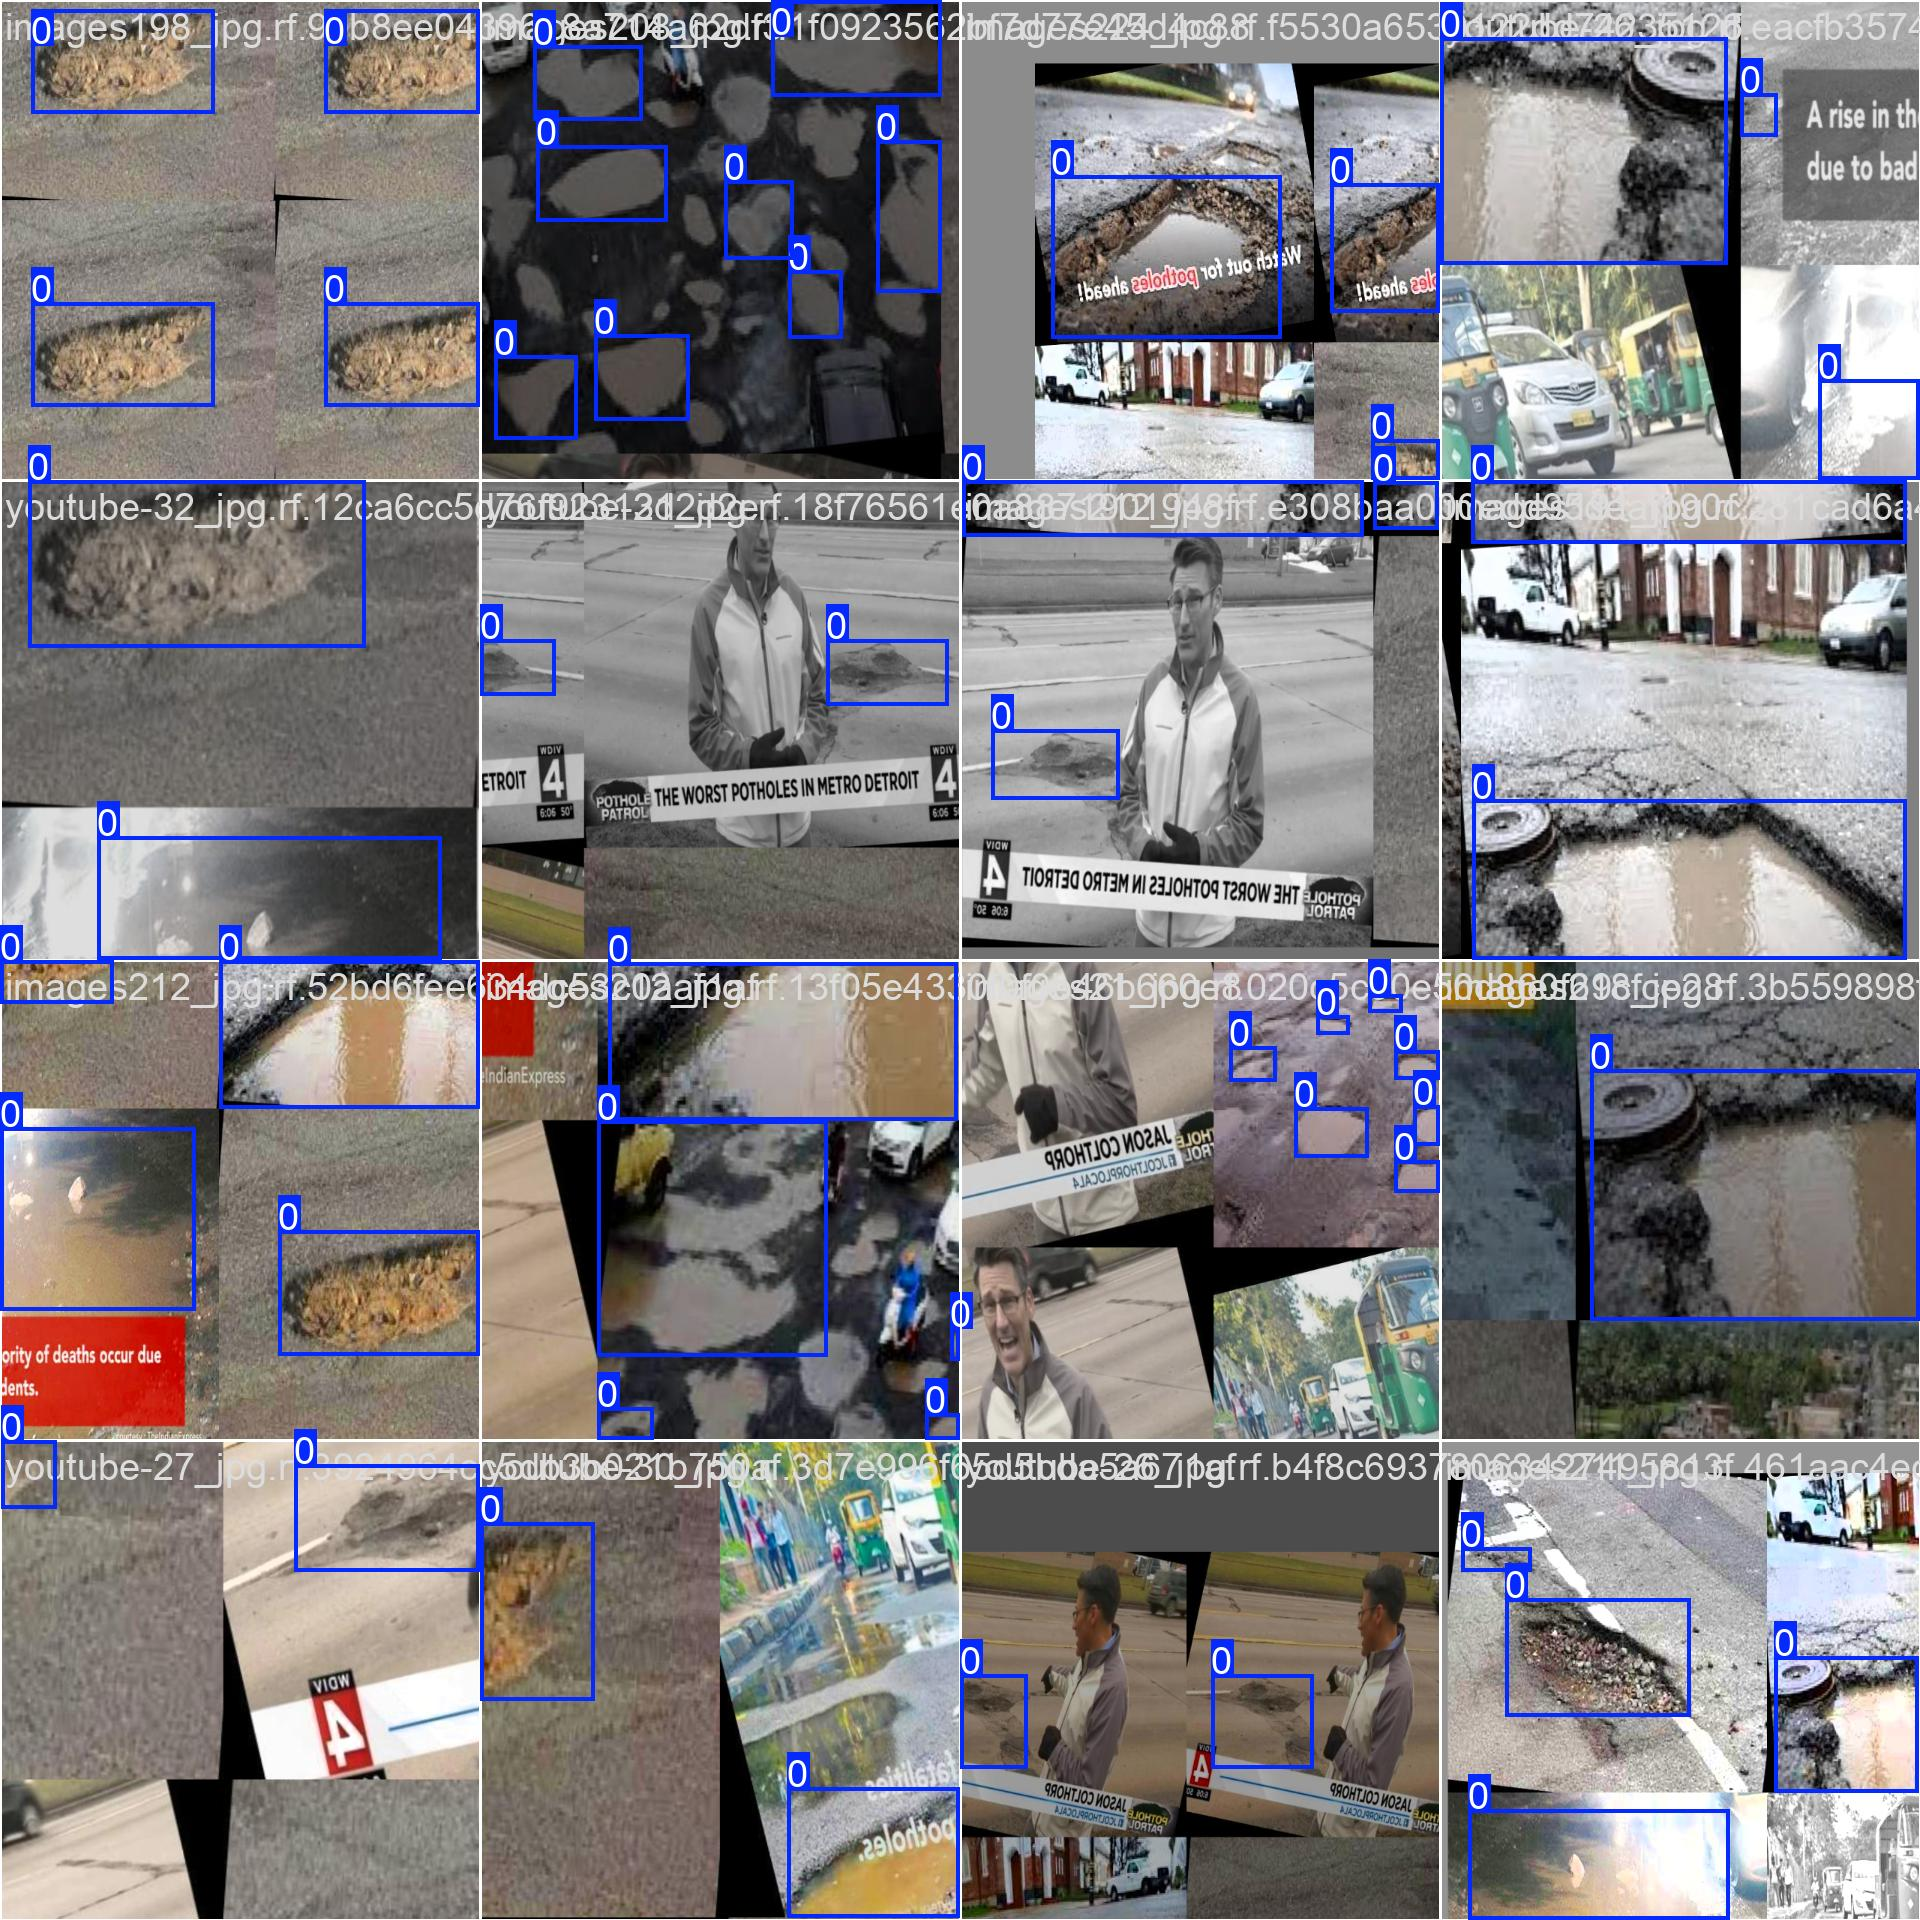

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

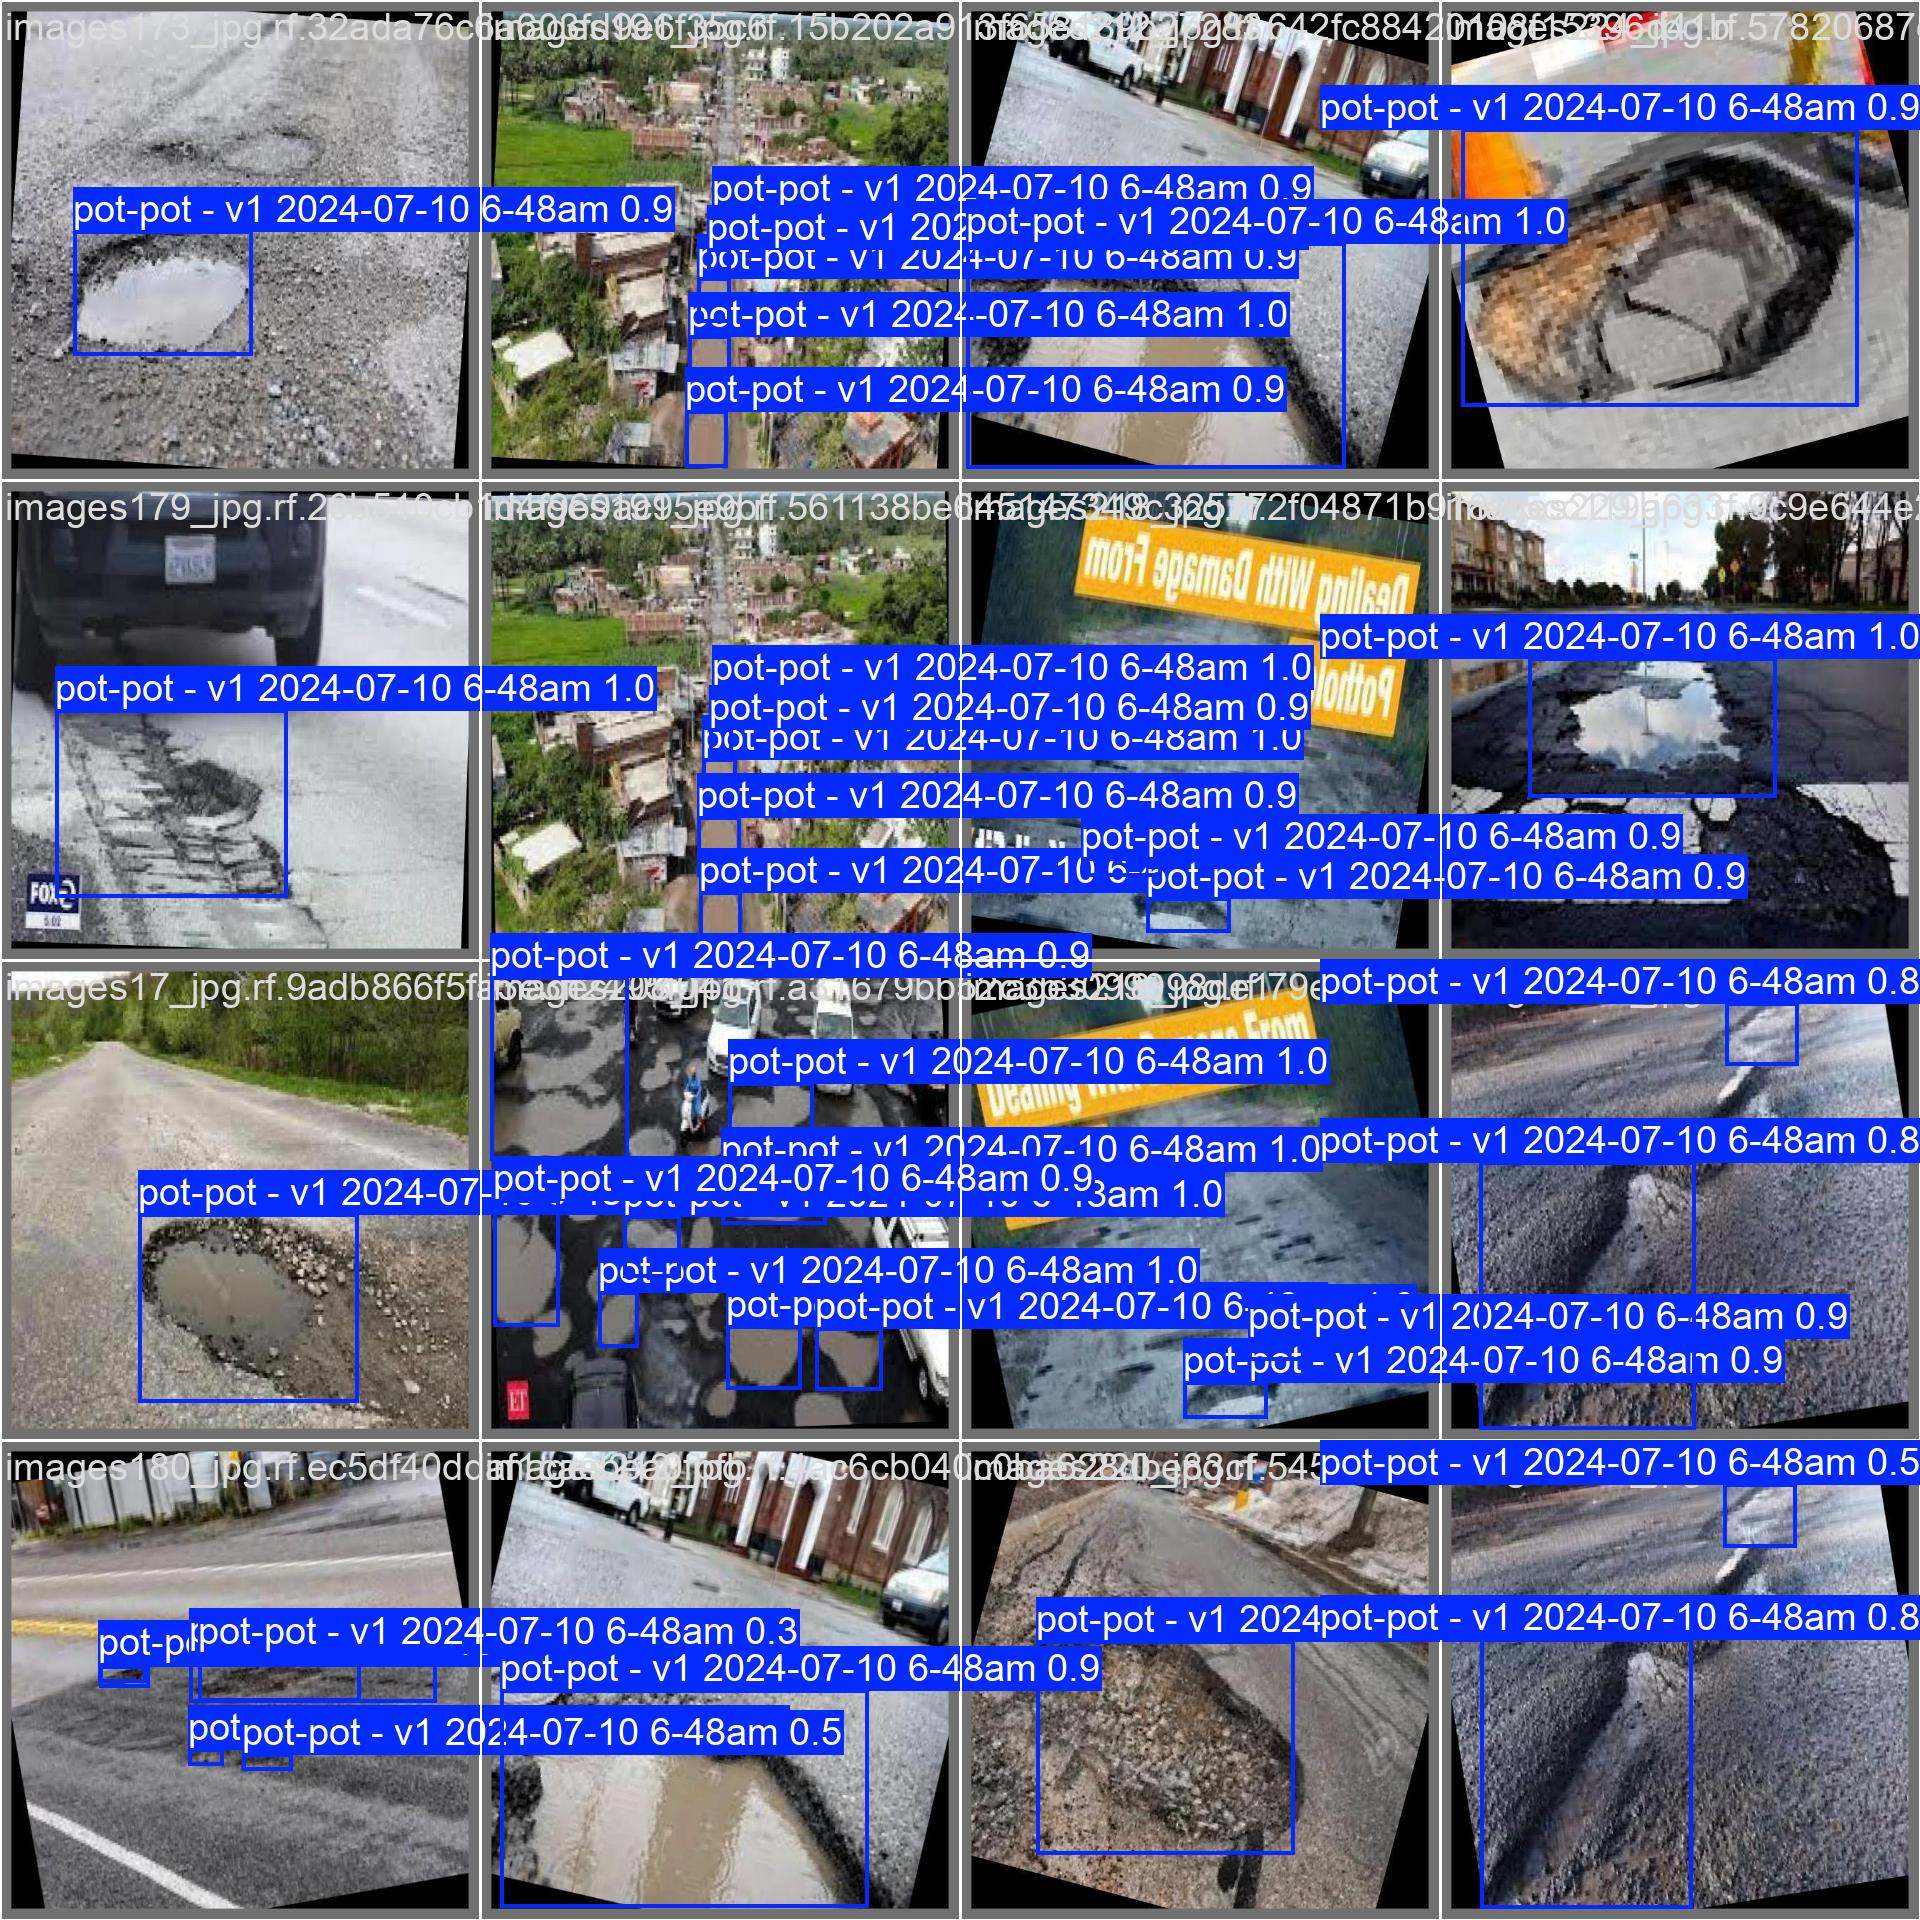

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Kuwait-Potholes-1/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.14s/it]
                   all         28         56          1      0.893      0.962      0.881
Speed: 4.7ms preprocess, 16.4ms inference, 0.0ms loss, 40.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/54 /content/Kuwait-Potholes-1/test/images/images155_jpg.rf.782178c9d052861e316d997d89f1213c.jpg: 640x640 1 pot-pot - v1 2024-07-10 6-48am, 11.0ms
image 2/54 /content/Kuwait-Potholes-1/test/images/images173_jpg.rf.7aa1ef2278273447accce93e52c9ce69.jpg: 640x640 1 pot-pot - v1 2024-07-10 6-48am, 9.2ms
image 3/54 /content/Kuwait-Potholes-1/test/images/images175_jpg.rf.5c3e921fe9efc4dbf85ae8272c749e9d.jpg: 640x640 3 pot-pot - v1 2024-07-10 6-48ams, 7.8ms
image 4/54 /content/Kuwait-Potholes-1/test/images/images175_jpg.rf.fdf7dab2207430a34734ca8b0a03f7c7.jpg: 640x640 3 pot-pot - v1 2024-07-10 6-48ams, 7.8ms
image 5/54 /content/Kuwait-Potholes-1/test/images/images179_jpg.rf.7f20c39a0c9707ab336ea6ca7c367df4.jpg: 640x640 1 pot-pot - v1 2024-07-10 6-48am, 8.0ms
image 6/54 /content/Kuwait-Potholes-1/test/images/images191_jpg.rf

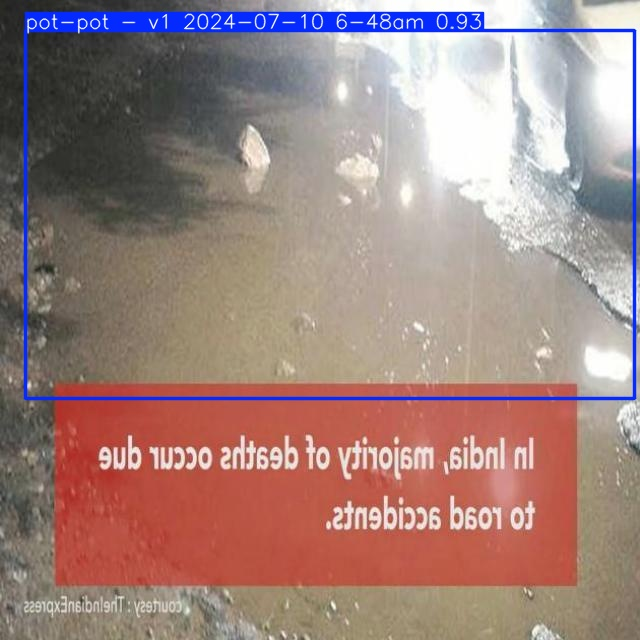

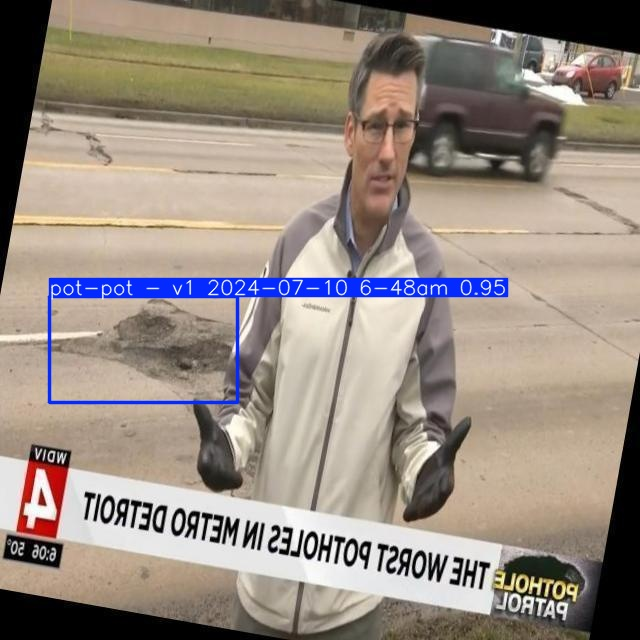

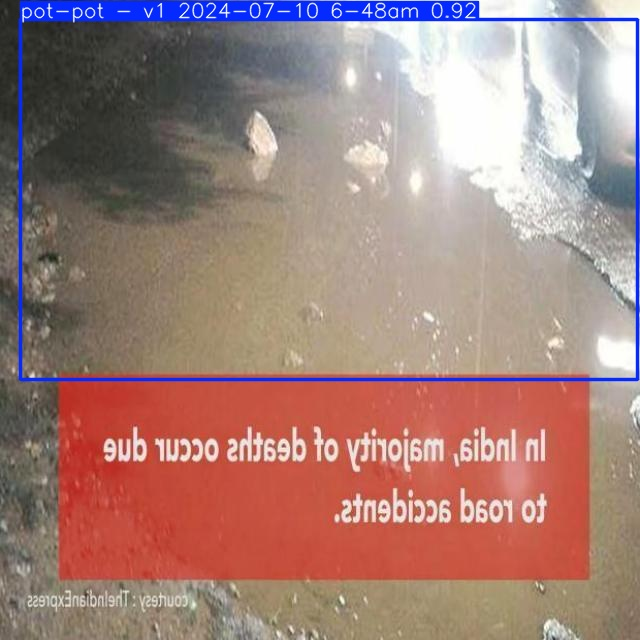

In [22]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [25]:
!gdown 'https://drive.google.com/file/d/1TKcbXTE3s1f9ervAMH4PBOwLApxxT1yX/view?usp=sharing'

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1TKcbXTE3s1f9ervAMH4PBOwLApxxT1yX
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1TKcbXTE3s1f9ervAMH4PBOwLApxxT1yX/view?usp=sharing
To: /content/view?usp=sharing
93.5kB [00:00, 5.76MB/s]


In [27]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=img1.jpeg save=True

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/img1.jpeg: 448x640 1 pot-pot - v1 2024-07-10 6-48am, 76.1ms
Speed: 5.0ms preprocess, 76.1ms inference, 904.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [29]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="v1.mov" save=True

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/900) /content/v1.mov: 384x640 (no detections), 74.6ms
video 1/1 (frame 2/900) /content/v1.mov: 384x640 (no detections), 19.4ms
video 1/1 (frame 3/900) /content/v1.mov: 384x640 (no detections), 24.8ms
video 1/1 (frame 4/900) /content/v1.mov: 384x640 (no detections), 18.0ms
video 1/1 (frame 5/900) /content/v1.mov: 384x640 (no detections), 26.0ms
video 1/1 (frame 6/900) /content/v1.mov: 384x640 (no detections), 32.0ms
video 1/1 (frame 7/900) /content/v1.mov: 384x640 (no detections), 26.1ms
video 1/1 (frame 8/900) /content/v1.mov: 384x640 (no detections), 28.2ms
video 1/1 (frame 9/900) /content/v1.mov: 384x640 (no detections), 21.3ms
video 1/1 (frame 10/900) /content/v1.mov: 384x640 (no detections), 39.8ms
video 1/1 (frame 11/900) /content/v1.mov: 384x640 (no detections), 25.5ms
video 1/1 (frame 12/900) /con

In [31]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/v1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)

TypeError: not all arguments converted during string formatting

In [32]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)

TypeError: not all arguments converted during string formatting